<a href="https://www.kaggle.com/code/kamalapousajja/keras-project-loan-analysis?scriptVersionId=153158130" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Keras Project ~ Loan analysis ~

**Loan Analysis Problem Statement**

**Introduction**

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

**Our Goal**

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!



In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load csv file of the feature information 

data_info = pd.read_csv('/kaggle/input/lending-club-info/lending_club_info.csv',index_col='LoanStatNew')

data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [3]:
# Get the description of loan_amnt

print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [4]:
# Get the description of mort_acc

print(data_info.loc['mort_acc']['Description'])

Number of mortgage accounts.


In [5]:
# Create the function to see the description

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
# Load the second csv data

df = pd.read_csv('/kaggle/input/lending-club-loan-two/lending_club_loan_two.csv')

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
# Check the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

**OVERALL GOAL:** 

Get an understanding for which variables are important, view summary statistics, and visualize the data

<Axes: xlabel='loan_status', ylabel='count'>

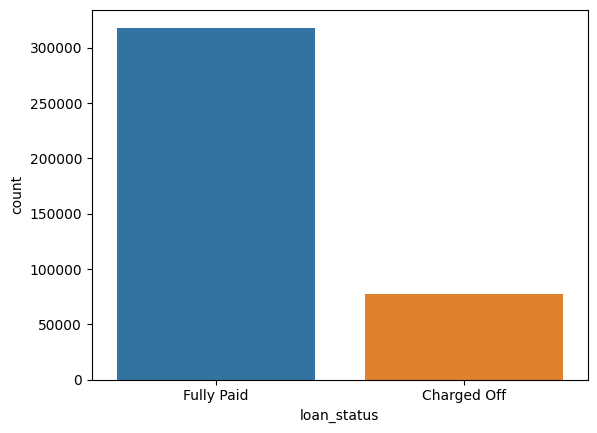

In [9]:
# Since we will be attempting to predict 'loan_status',
# Create the countplot of the 'loan_status' column

sns.countplot(x='loan_status',data=df)

(0.0, 45000.0)

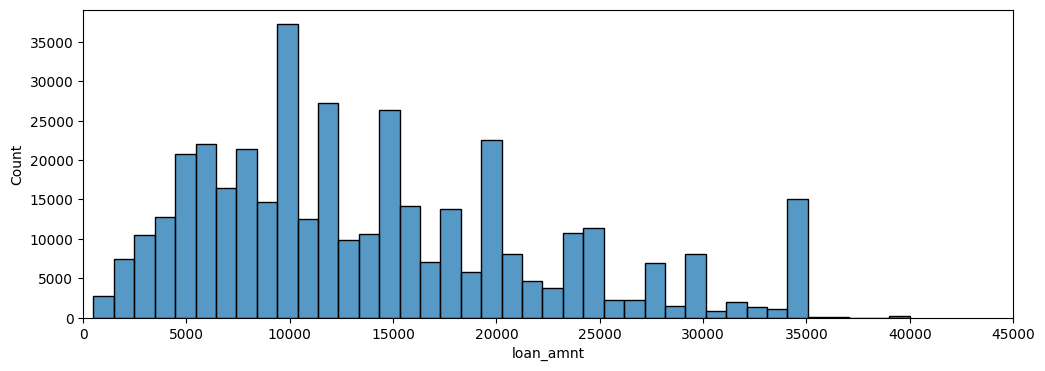

In [10]:
# Create a histogram of the 'loan_amnt' column

plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

In [11]:
# Explore correlation between the continuous feature variables. 
# Calculate the correlation between all continuous numeric variables.

df.corr(numeric_only = True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

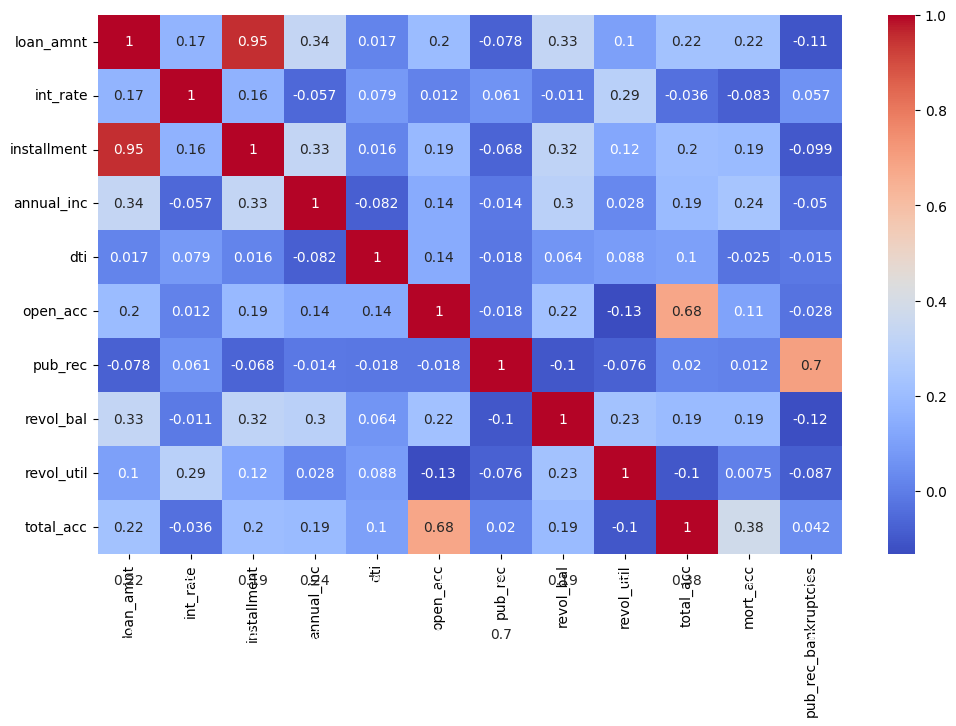

In [12]:
# Visualisation

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='coolwarm')
plt.ylim(10, 0)

In [13]:
# Print out the description of 'installment' and 'loan_amnt' 
# And perform a scatterplot between them.

feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

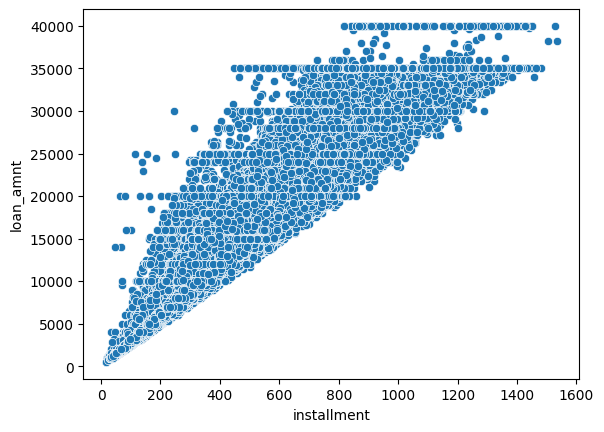

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

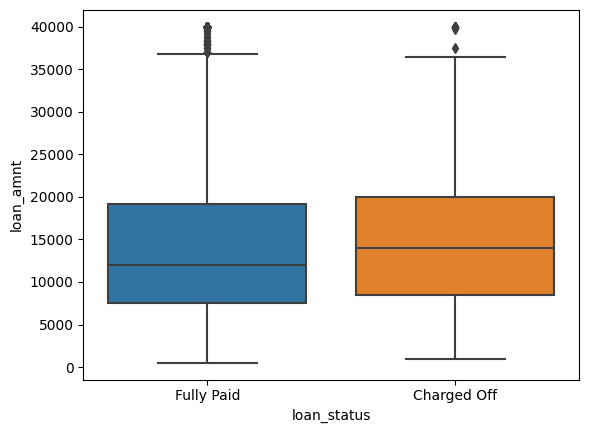

In [16]:
# Create a boxplot showing the relationship between the loan_status and the Loan Amount.

sns.boxplot(x='loan_status', y='loan_amnt',data=df)

In [17]:
# Calculate the summary statistics for the loan amount, grouped by the loan_status.

df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
# Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. 
# What are the unique possible grades and subgrades?

sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

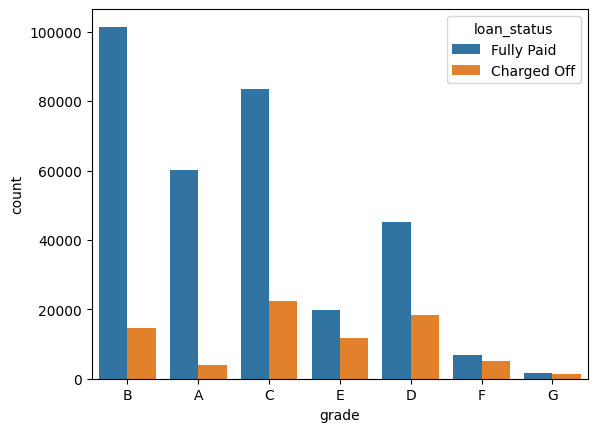

In [20]:
# Create a countplot per grade. 
# Set the hue to the loan_status label.

sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

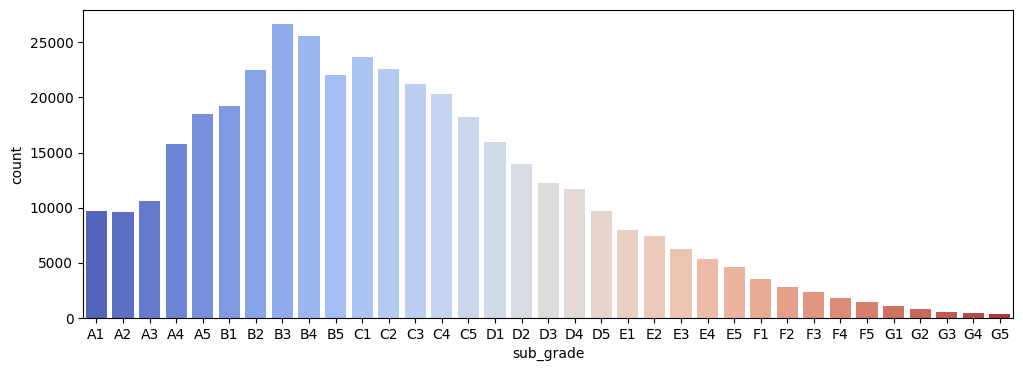

In [21]:
# Display a count plot per subgrade

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique()) # Reorder the x axis

sns.countplot(x='sub_grade',data=df,order = subgrade_order, palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

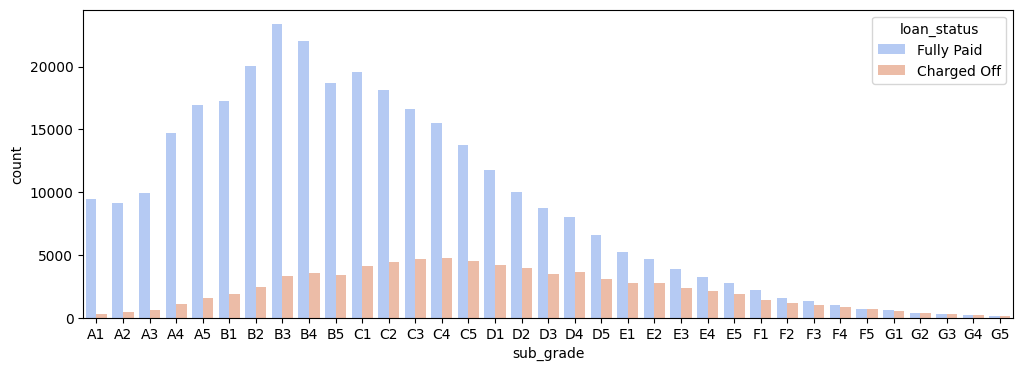

In [22]:
# Explore both all loans made per subgrade, being separated based on the loan_status

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())

sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

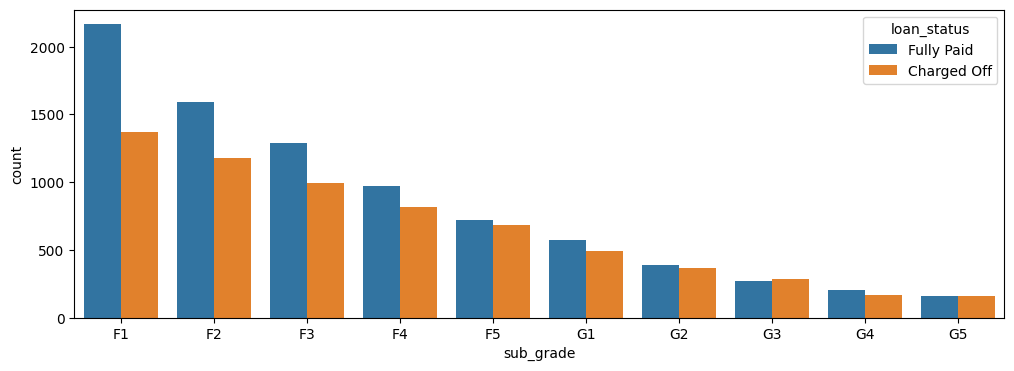

In [23]:
# It looks like F and G subgrades don't get paid back that often. 
# Isloate those and recreate the countplot just for those subgrades.

f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())

sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [24]:
# Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [25]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

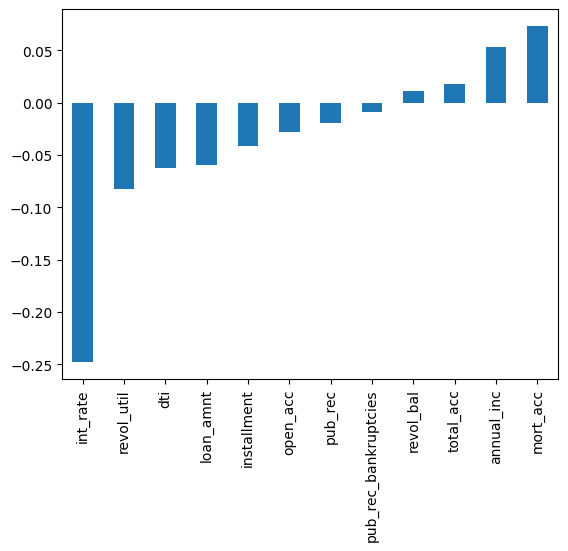

In [26]:
# Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.

df.corr(numeric_only = True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Section 2: Data PreProcessing

**Section Goals:** 

* Remove or fill any missing data. 
* Remove unnecessary or repetitive features. 
* Convert categorical string features to dummy variables.

In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.

In [28]:
# What is the length of the dataframe?

len(df)

396030

In [29]:
# Find the total count of missing values per column.

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [30]:
# Convert this Series to be in term of percentage of the total DataFrame

100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

> 'emp_title' column and 'emp_length' column

In [31]:
# Let's examine emp_title and emp_length to see whether it will be okay to drop them. 
# Print out their feature information using the feat_info() function from the top of this notebook.

feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [32]:
# How many unique employment job titles are there?

df['emp_title'].nunique()

173105

In [33]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [34]:
# Realistically there are too many unique job titles to try to convert this to a dummy variable feature. 
# Let's remove that emp_title column.

df = df.drop('emp_title',axis=1)

> 'emp_length' column

In [35]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [36]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<Axes: xlabel='emp_length', ylabel='count'>

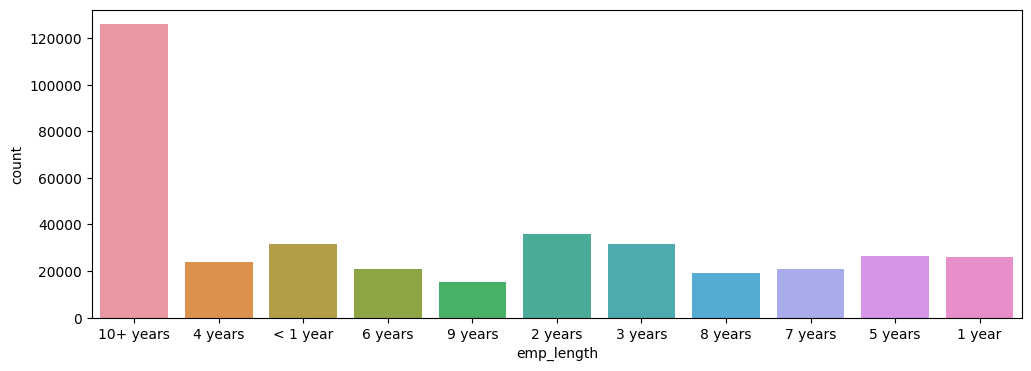

In [37]:
# Create a count plot of the emp_length feature column.

plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df)

<Axes: xlabel='emp_length', ylabel='count'>

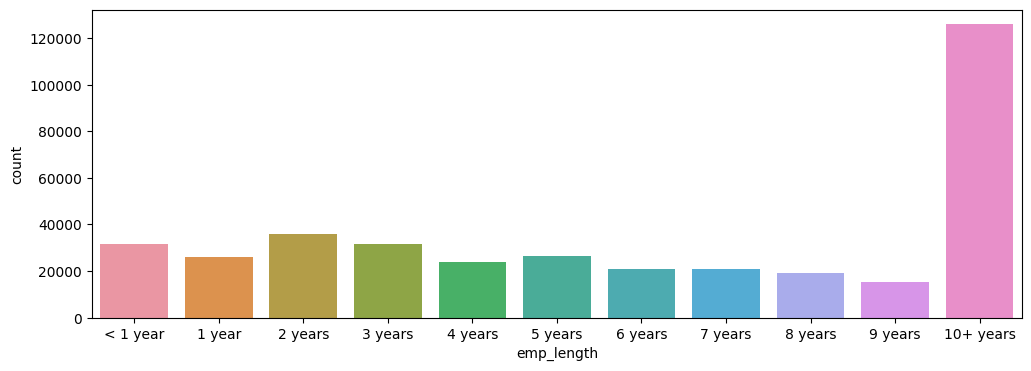

In [38]:
# Sort the order of the values.

plt.figure(figsize=(12,4))

emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']


sns.countplot(x='emp_length',data=df,order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

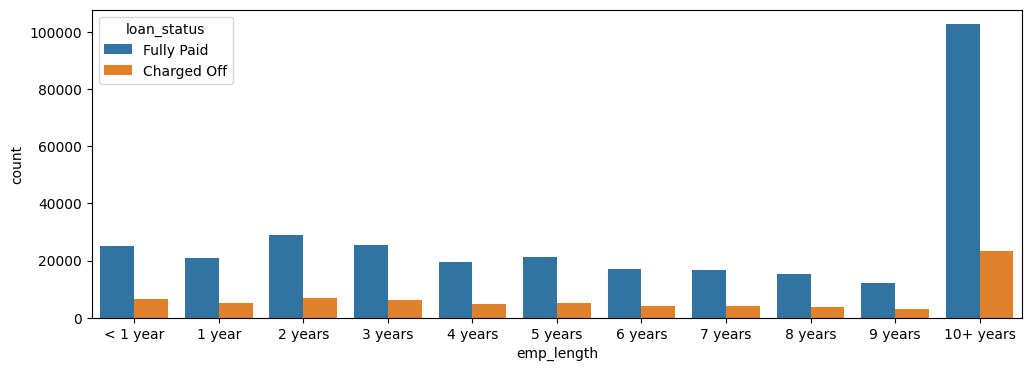

In [39]:
# Plot out the countplot with a hue separating Fully Paid vs Charged Off

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. 

Essentially informing us what percent of people per employment category didn't pay back their loan. 

In [40]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [41]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [42]:
emp_len = emp_co/emp_fp

In [43]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

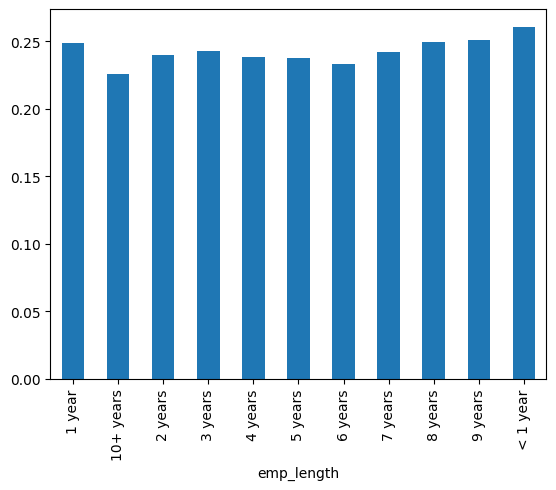

In [44]:
emp_len.plot(kind='bar')

In [45]:
# From barplot, charge off rates are extremely similar across all employment lengths. 
# Go ahead and drop the emp_length column.

df = df.drop('emp_length',axis=1)

In [46]:
# Revisit the DataFrame to see what feature columns still have missing data.

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

> 'title' column and 'purpose' column

In [47]:
# Review the 'title' column vs the 'purpose' column. 
# Is this repeated information?

df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [48]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [49]:
# The title column is simply a string subcategory/description of the purpose column. 
# Go ahead and drop the title column.

df = df.drop('title',axis=1)

> 'mort_acc' column

In [50]:
# Find out what the mort_acc feature represents

feat_info('mort_acc')

Number of mortgage accounts.


In [51]:
# Create a value_counts of the mort_acc column.

df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

There are many ways we could deal with this missing data. 

We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! 

Let's review the other columsn to see which most highly correlates to mort_acc

In [52]:
print("Correlation with the mort_acc column")
df.corr(numeric_only=True)['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [53]:
# Looks like the 'total_acc' feature correlates with the 'mort_acc' , this makes sense! 
# Let's try this fillna() approach. 
# We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. 

print("Mean of mort_acc column per total_acc")

df.groupby('total_acc').mean(numeric_only = True)['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [54]:
# Let's fill in the missing mort_acc values based on their total_acc value. 
# If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. 
# This involves using an .apply() method with two columns. 

total_acc_avg = df.groupby('total_acc').mean(numeric_only = True)['mort_acc']

In [55]:
total_acc_avg[2.0]

0.0

In [56]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [57]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [58]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

> 'revol_util' and 'pub_rec_bankruptcies' column

In [59]:
# 'revol_util' and the 'pub_rec_bankruptcies' have missing data points, but they account for less than 0.5% of the total data. 
# Go ahead and remove the rows that are missing those values in those columns with dropna().

df = df.dropna()

In [60]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Variables and Dummy Variables

We're done working with the missing data! 

Now we just need to deal with the string values due to the categorical columns.

In [61]:
# List all the columns that are currently non-numeric

df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Let's now go through all the string features to see what we should do with them.

> term feature

In [62]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [63]:
# Convert the term feature into either a 36 or 60 integer numeric data type 

df['term'] = df['term'].apply(lambda term: int(term[:3]))

# or use .map()

> grade feature

In [64]:
# We already know grade is part of sub_grade, so just drop the grade feature.

df = df.drop('grade',axis=1)

In [65]:
# Convert the subgrade into dummy variables. 
# Then concatenate these new columns to the original dataframe. 
# Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.

subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [66]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [68]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,False,False,False,False,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,False,False,False,False,False,False,False,False,False,False


In [69]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

> verification_status, application_type,initial_list_status,purpose

In [70]:
# Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. 
# Remember to set drop_first=True and to drop the original columns.

dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

df = pd.concat([df,dummies],axis=1)

In [71]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

> home_ownership

In [72]:
# Review the value_counts for the home_ownership column.

df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [73]:
#  Replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. 

df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')


In [74]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [75]:
# Convert these to dummy variables,
# Then concatenate them with the original dataframe. 
# Remember to set drop_first=True and to drop the original columns.

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [76]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

> address

In [77]:
# Let's feature engineer a zip code column from the address in the data set. 
# Create a column called 'zip_code' that extracts the zip code from the address column.

df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [78]:
# Now make this zip_code column into dummy variables using pandas. 
# Concatenate the result and drop the original zip_code column along with dropping the address column.

dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [79]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

> issue_d

In [80]:
# This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, 
# so in theory we wouldn't have an issue_date, drop this feature.
    
df = df.drop('issue_d',axis=1)

> earliest_cr_line

In [81]:
# This appears to be a historical time stamp feature. 
# Extract the year from this feature using a .apply function, then convert it to a numeric feature. 
# Set this new data to a feature column called 'earliest_cr_year'.
# Then drop the earliest_cr_line feature.

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

df = df.drop('earliest_cr_line',axis=1)

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '226

In [83]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# Train Test Split

In [84]:
# Import train_test_split from sklearn.

from sklearn.model_selection import train_test_split

In [85]:
# Drop the 'loan_status' column we created earlier, since its a duplicate of the 'loan_repaid' column. 
# We'll use the 'loan_repaid' column since its already in 0s and 1s.

df = df.drop('loan_status',axis=1)

In [86]:
# Set X and y variables to the .values of the features and label.

X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [87]:
# OPTIONAL: Grabbing a Sample for Training Time
# OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. 
# Highly recommended for lower RAM computers or if you are not using GPU.
    
# df = df.sample(frac=0.1,random_state=101)

print(len(df))

395219


In [88]:
# Perform a train/test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [89]:
# Normalizing the Data
# Use a MinMaxScaler to normalize the feature data X_train and X_test. 
# Recall we don't want data leakge from the test set so we only fit on the X_train data.
    
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [90]:
X_train = scaler.fit_transform(X_train)

In [91]:
X_test = scaler.transform(X_test)

# Creating the Model

In [92]:
# Import the necessary Keras functions.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [93]:
# Build a sequential model to will be trained on the data.

model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [94]:
# Fit the model to the training data for at least 25 epochs. 
# Also add in the validation data for later plotting. 
# Optional: add in a batch_size of 256.

model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.2956 - val_loss: 0.2643
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2650 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2629 - val_loss: 0.2624
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2616 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2606 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2603 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2596 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2591 - val_loss: 0.2612
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.258

# Section 3: Evaluating Model Performance.

In [95]:
# Plot out the validation loss versus the training loss.

losses = pd.DataFrame(model.history.history)

<Axes: >

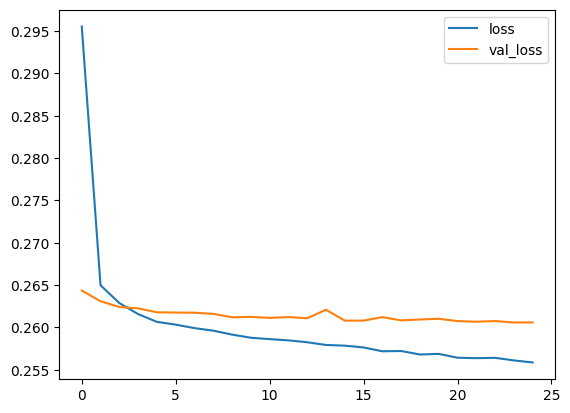

In [96]:
losses[['loss','val_loss']].plot()

In [97]:
# Create predictions from the X_test set
# Display a classification report and confusion matrix for the X_test set.

from sklearn.metrics import classification_report,confusion_matrix

predictions = (model.predict(X_test) > 0.5).astype("int32")

# OR use this code ; predictions = np.argmax(model.predict(X_test),axis=1)

2471/2471 [==============================] - 3s 1ms/step


In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [99]:
print(confusion_matrix(y_test,predictions))

[[ 6841  8817]
 [  101 63285]]


In [100]:
# TASK: Given the customer below, would you offer this person a loan?

import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]

new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [101]:
new_customer_test = new_customer.values.reshape(1,78).astype("int32")

new_predict = np.argmax(model.predict(new_customer_test),axis=1)


1/1 [==============================] - 0s 71ms/step


In [102]:
# TASK: Now check, did this person actually end up paying back their loan?

df.iloc[random_ind]['loan_repaid']

1